<a href="https://colab.research.google.com/github/Kaiyrkul/data_science_auca/blob/main/lab2_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

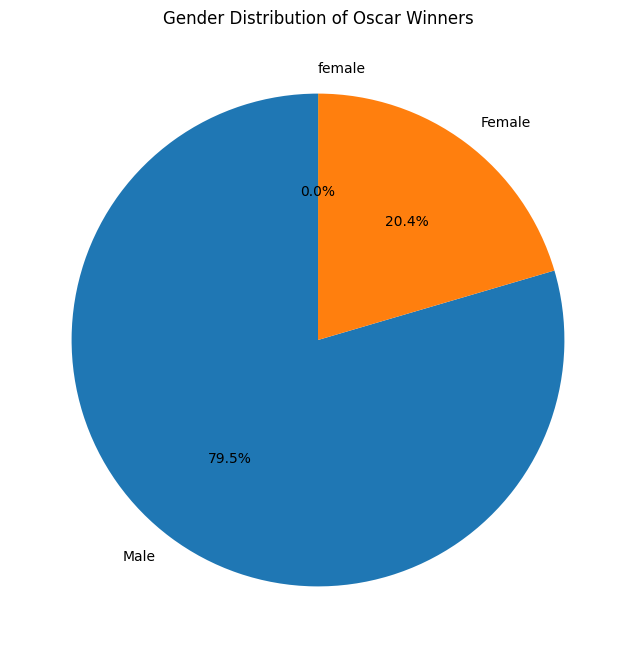


Оценка круговой диаграммы:
- Качество: Диаграмма хорошо отображает соотношение полов. Она проста и понятна.
- Информативность: Отлично подходит для отображения процентного соотношения.
- Возможные модификации: можно добавить больше цветов или выделить самый большой сегмент для лучшей видимости.


/tmp/ipython-input-3333946041.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


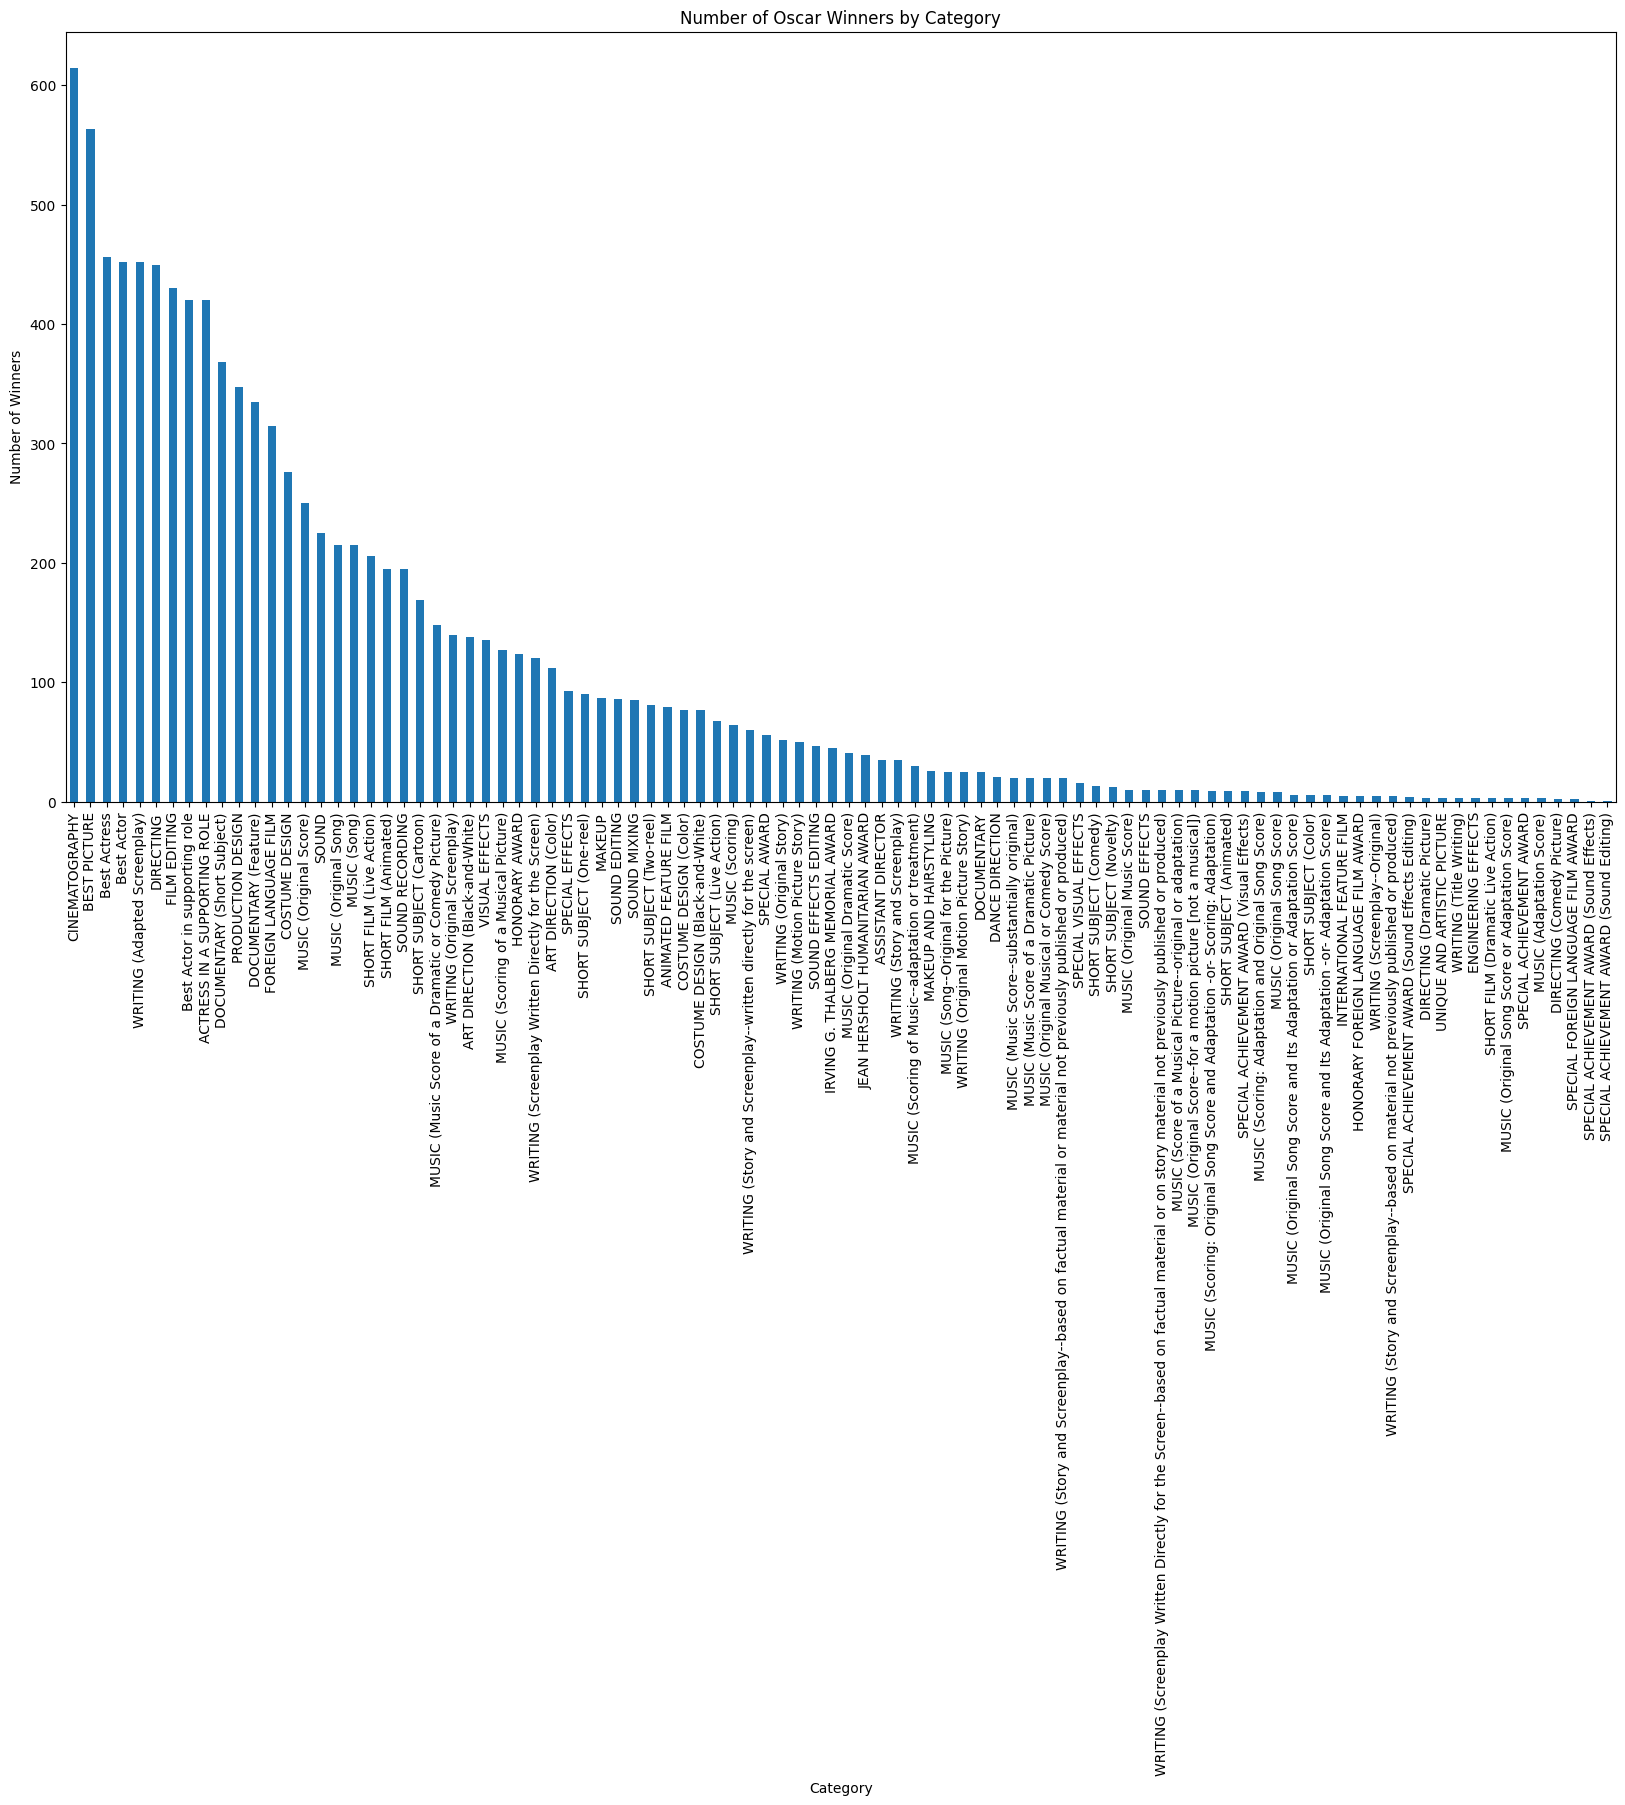


Оценка столбчатой диаграммы:
- Качество: Диаграмма показывает все категории, но из-за большого количества названий она плохо читается.
- Информативность: Показывает общую картину, но конкретные категории сложно различить.
Enter n: 10


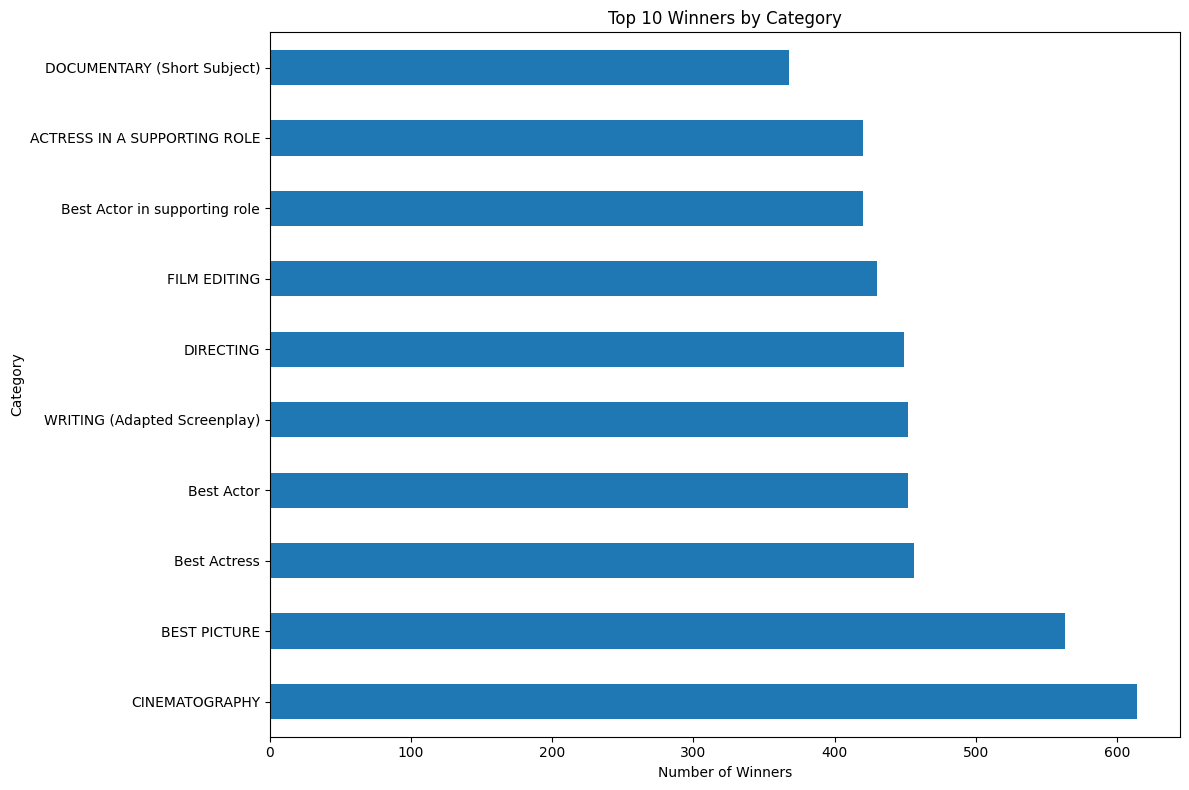


Сравнение столбчатых диаграмм:
Первая диаграмма (все категории) дает полное представление о данных, но плохо читается.
Вторая диаграмма (топ N) гораздо информативнее и легче для восприятия. Она фокусируется на самых важных категориях.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Установка openpyxl для работы с .xlsx файлами
!pip install openpyxl

# Обернем весь код в try-except для обработки исключений
try:
    # 2. Загрузка данных из oscars.xlsx в DataFrame
    df = pd.read_excel('oscars.xlsx')

    # 3. Построение круговой диаграммы (Pie Chart) по полу
    # Предполагаем, что столбец с полом называется 'gender'
    gender_counts = df['gender'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Gender Distribution of Oscar Winners')
    plt.savefig('gender_distribution.png')
    plt.show()

    # 4. Анализ круговой диаграммы (Задание 4)
    print("\nОценка круговой диаграммы:")
    print("- Качество: Диаграмма хорошо отображает соотношение полов. Она проста и понятна.")
    print("- Информативность: Отлично подходит для отображения процентного соотношения.")
    print("- Возможные модификации: убрать повторяющиеся слова.")

    # 5. Построение столбчатой диаграммы (Bar Chart) по категориям
    # Группируем по категориям и считаем количество победителей
    winners_by_category = df['Category'].value_counts()

    plt.figure(figsize=(20, 10))
    winners_by_category.plot(kind='bar')
    plt.title('Number of Oscar Winners by Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Winners')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('winners_by_category.png')
    plt.show()

    # 6. Оценка качества столбчатой диаграммы (Задание 6)
    print("\nОценка столбчатой диаграммы:")
    print("- Качество: Диаграмма показывает все категории, но из-за большого количества названий она плохо читается.")
    print("- Информативность: Показывает общую картину, но конкретные категории сложно различить.")

    # 7. Построение столбчатой диаграммы для N самых частых категорий
    try:
        n_str = input("Enter n: ").strip()
        n = int(n_str)
        top_n_categories = winners_by_category.head(n)

        plt.figure(figsize=(12, 8))
        top_n_categories.plot(kind='barh')
        plt.title(f'Top {n} Winners by Category')
        plt.xlabel('Number of Winners')
        plt.ylabel('Category')
        plt.tight_layout()
        plt.savefig(f'top_{n}_winners_by_category.png')
        plt.show()

    except ValueError:
        print("Ошибка: Введите число для n.")

    # 8. Сравнение двух столбчатых диаграмм (Задание 8)
    print("\nСравнение столбчатых диаграмм:")
    print("Первая диаграмма (все категории) дает полное представление о данных, но плохо читается.")
    print("Вторая диаграмма (топ N) гораздо информативнее и легче для восприятия. Она фокусируется на самых важных категориях.")

except FileNotFoundError:
    print("Ошибка: Файл oscars.xlsx не найден. Убедитесь, что он загружен в Colab.")
except KeyError:
    print("Ошибка: В датасете отсутствуют ожидаемые колонки (например, 'gender' или 'category').")
except Exception as e:
    print(f"Произошла неожиданная ошибка: {e}")